# World Cup 2023 Analysis

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\akash\Downloads\CWC23_all_innings.csv")

In [3]:
data.head()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(1408, 20)

In [5]:
data.columns

Index(['team', 'player', 'bat_or_bowl', 'bb_bf', 'runs', 'wkts',
       'wicketball_prob', 'runs_per_ball', 'opposition', 'ground',
       'start_date', 'overs', 'mdns', 'econ', 'inns', '4s', '6s', 'sr',
       'not_out', 'mins'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

In [7]:
data.isnull().sum()

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               846
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              846
mdns               846
econ               846
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64

In [8]:
data.describe()

,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
count,1408.000000,1408.000000,562.000000,1408.000000,1408.000000,562.000000,562.000000,562.000000,1408.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,35.305398,33.237216,1.204626,0.070574,0.898755,7.342527,0.256228,5.946637,1.470881,2.605201,0.751773,83.716596,0.151300,42.721040
std,25.248709,28.056329,1.198237,0.152535,0.471051,2.679736,0.532547,2.141566,0.499329,3.146922,1.504184,52.475444,0.358553,41.576908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,1.350000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.750000,11.000000,0.000000,0.010724,0.621350,5.550000,0.000000,4.500000,1.000000,0.000000,0.000000,51.610000,0.000000,12.000000
50%,32.000000,29.000000,1.000000,0.032258,0.879005,8.000000,0.000000,5.675000,1.000000,2.000000,0.000000,81.810000,0.000000,28.000000
75%,54.000000,49.000000,2.000000,0.062500,1.130819,10.000000,0.000000,7.120000,2.000000,4.000000,1.000000,107.020000,0.000000,60.000000
max,143.000000,201.000000,7.000000,1.000000,6.000000,10.000000,3.000000,16.000000,2.000000,21.000000,11.000000,600.000000,1.000000,217.000000


# 1. Team Performance Analysis:

In [9]:
# Team-wise performance metrics
team_performance = data.groupby('team').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'runs_per_ball': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum',
    'not_out': 'sum'
}).reset_index()

team_performance

,team,runs,wkts,runs_per_ball,econ,4s,6s,not_out
0,AFG,4134,53.0,0.855123,5.763818,178.0,42.0,12.0
1,AUS,5234,77.0,0.890978,5.661129,265.0,92.0,15.0
2,BAN,4358,51.0,0.840755,6.095769,188.0,43.0,13.0
3,ENG,4396,65.0,0.935399,6.068302,216.0,51.0,12.0
4,IND,4783,94.0,0.920735,4.963793,265.0,89.0,18.0
5,NED,4268,63.0,0.809495,6.170339,163.0,33.0,10.0
6,NZ,5376,71.0,1.000762,6.237143,265.0,82.0,15.0
7,PAK,4786,65.0,0.933415,6.286923,220.0,60.0,10.0
8,SA,5097,88.0,0.970307,5.682778,243.0,99.0,15.0
9,SL,4366,50.0,0.837546,6.606111,201.0,45.0,8.0



- New Zealand (NZ) stands out with a high score in runs and runs per ball ratio, indicating strong batting performance.
- India (IND) shows strong bowling performance with the highest number of wickets taken and the lowest economy rate.
- Australia (AUS) and South Africa (SA) have balanced performances, showing good runs scored, wickets taken, and boundary hits.
- Sri Lanka (SL) has relatively weaker performance metrics compared to other teams, especially in terms of runs scored, wickets taken, and economy rate.

In [10]:
# Analyze batting and bowling styles of eac team
batting_styles = data[data['bat_or_bowl'] == 'bat']['team'].value_counts()
bowling_styles = data[data['bat_or_bowl'] == 'bowl']['team'].value_counts()

print("\nBatting Styles:")
print(batting_styles)

print("\nBowling Styles:")
print(bowling_styles)


Batting Styles:
ENG    98
NED    98
AUS    93
BAN    89
SA     87
SL     84
NZ     81
PAK    76
AFG    74
IND    66
Name: team, dtype: int64

Bowling Styles:
NZ     63
AUS    62
NED    59
IND    58
AFG    55
SA     54
SL     54
ENG    53
PAK    52
BAN    52
Name: team, dtype: int64



- England (ENG) and Netherlands (NED) show a strong preference for batting, as they have the highest number of instances in batting styles.
- New Zealand (NZ) and Australia (AUS) have a balanced approach, featuring prominently in both batting and bowling styles.
- Bangladesh (BAN), Pakistan (PAK), and India (IND) exhibit a tendency towards bowling, as they have relatively higher instances in bowling styles compared to batting styles.
- Sri Lanka (SL) is notably absent from the top positions in both batting and bowling styles, suggesting a need for improvement in performance consistency across both disciplines.








In [11]:
# Identify top-performing teams based on runs scored
top_teams_runs = team_performance.sort_values(by='runs', ascending=False).head(5)
print("Top Performing Teams by runs scored:")
print(top_teams_runs)


Top Performing Teams by runs scored:
  team  runs  wkts  runs_per_ball      econ     4s    6s  not_out
6   NZ  5376  71.0       1.000762  6.237143  265.0  82.0     15.0
1  AUS  5234  77.0       0.890978  5.661129  265.0  92.0     15.0
8   SA  5097  88.0       0.970307  5.682778  243.0  99.0     15.0
7  PAK  4786  65.0       0.933415  6.286923  220.0  60.0     10.0
4  IND  4783  94.0       0.920735  4.963793  265.0  89.0     18.0


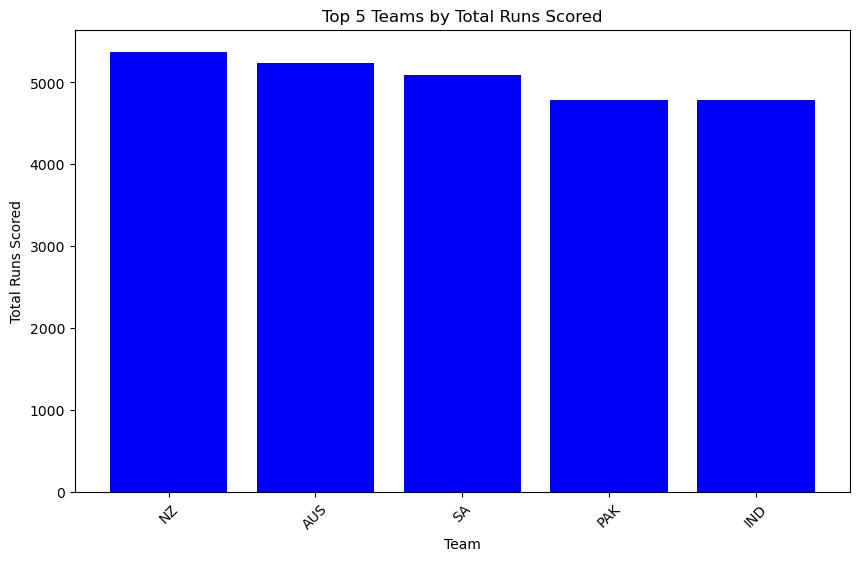

In [12]:
# Plotting top-performing teams based on runs scored
plt.figure(figsize=(10, 6))
plt.bar(top_teams_runs['team'], top_teams_runs['runs'], color='blue')
plt.xlabel('Team')
plt.ylabel('Total Runs Scored')
plt.title('Top 5 Teams by Total Runs Scored')
plt.xticks(rotation=45)
plt.show()


Based on the runs scored, the top 5 performing teams are New Zealand (NZ), Australia (AUS), South Africa (SA), Pakistan (PAK), and India (IND). These teams have consistently scored high runs, demonstrating strong batting capabilities and contributing significantly to their overall performance in cricket tournaments.

In [13]:
# Identify top-performing teams based on wickets taken
top_teams_wkts = team_performance.sort_values(by='wkts', ascending=False).head(5)
print("Top performing teams by wickets taken:")
print(top_teams_wkts)

Top performing teams by wickets taken:
  team  runs  wkts  runs_per_ball      econ     4s    6s  not_out
4  IND  4783  94.0       0.920735  4.963793  265.0  89.0     18.0
8   SA  5097  88.0       0.970307  5.682778  243.0  99.0     15.0
1  AUS  5234  77.0       0.890978  5.661129  265.0  92.0     15.0
6   NZ  5376  71.0       1.000762  6.237143  265.0  82.0     15.0
3  ENG  4396  65.0       0.935399  6.068302  216.0  51.0     12.0


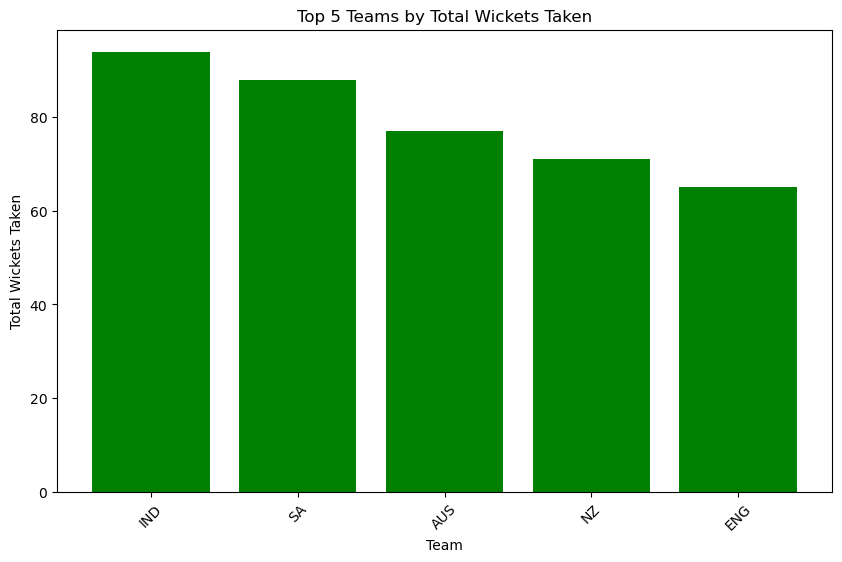

In [14]:
# Plotting top-performing teams based on wickets taken
plt.figure(figsize=(10, 6))
plt.bar(top_teams_wkts['team'], top_teams_wkts['wkts'], color='green')
plt.xlabel('Team')
plt.ylabel('Total Wickets Taken')
plt.title('Top 5 Teams by Total Wickets Taken')
plt.xticks(rotation=45)
plt.show()

- Based on the analysis, India (IND) stands out as the top-performing team by wickets taken, leading with 94 wickets.
- South Africa (SA) closely follows with 88 wickets, indicating a strong bowling performance.
- Australia (AUS), New Zealand (NZ), and England (ENG) also showcase commendable performances in terms of wickets taken, positioning them among the top-performing teams in this aspect

In [15]:
# Identify top-performing teams based on boundaries hit (4s)
top_teams_4s = team_performance.sort_values(by='4s', ascending=False).head(5)
print("\nTop performing teams by boundries hit 4s:")
print(top_teams_4s)


Top performing teams by boundries hit 4s:
  team  runs  wkts  runs_per_ball      econ     4s    6s  not_out
1  AUS  5234  77.0       0.890978  5.661129  265.0  92.0     15.0
4  IND  4783  94.0       0.920735  4.963793  265.0  89.0     18.0
6   NZ  5376  71.0       1.000762  6.237143  265.0  82.0     15.0
8   SA  5097  88.0       0.970307  5.682778  243.0  99.0     15.0
7  PAK  4786  65.0       0.933415  6.286923  220.0  60.0     10.0


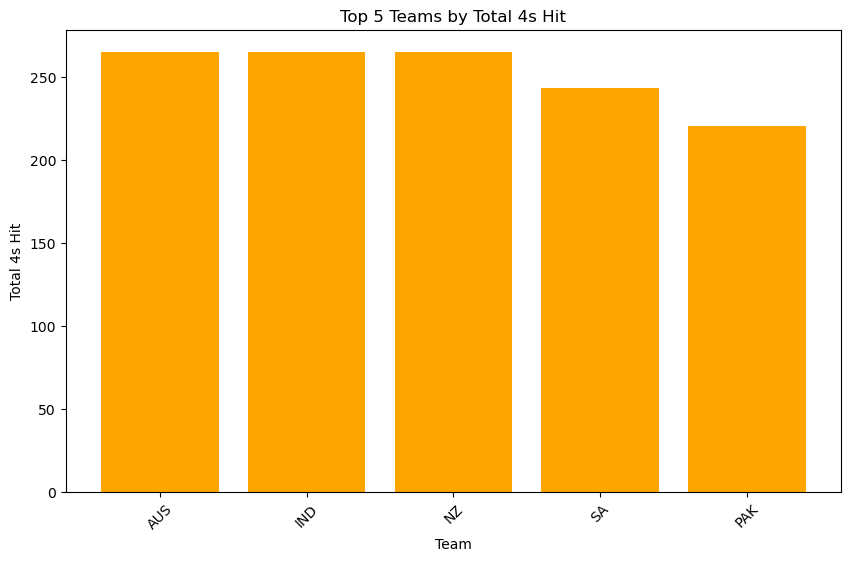

In [16]:
# Plotting top-performing teams based on boundaries hit (4s)
plt.figure(figsize=(10, 6))
plt.bar(top_teams_4s['team'], top_teams_4s['4s'], color='orange')
plt.xlabel('Team')
plt.ylabel('Total 4s Hit')
plt.title('Top 5 Teams by Total 4s Hit')
plt.xticks(rotation=45)
plt.show()



- Australia and India lead with 265 4s each, showcasing their strong batting capabilities.
- New Zealand closely follows with the same number of 4s, indicating consistent boundary-hitting prowess.
- South Africa and Pakistan demonstrate strong performances as well, with 243 and 220 4s respectively, showcasing their batting strength and ability to find the boundary regularly.

In [17]:
# Identify top-performing teams based on boundaries hit (6s)
top_teams_6s = team_performance.sort_values(by='6s', ascending=False).head(5)
print("\nTop performing teams by boundries hit 6s:")
print(top_teams_6s)


Top performing teams by boundries hit 6s:
  team  runs  wkts  runs_per_ball      econ     4s    6s  not_out
8   SA  5097  88.0       0.970307  5.682778  243.0  99.0     15.0
1  AUS  5234  77.0       0.890978  5.661129  265.0  92.0     15.0
4  IND  4783  94.0       0.920735  4.963793  265.0  89.0     18.0
6   NZ  5376  71.0       1.000762  6.237143  265.0  82.0     15.0
7  PAK  4786  65.0       0.933415  6.286923  220.0  60.0     10.0


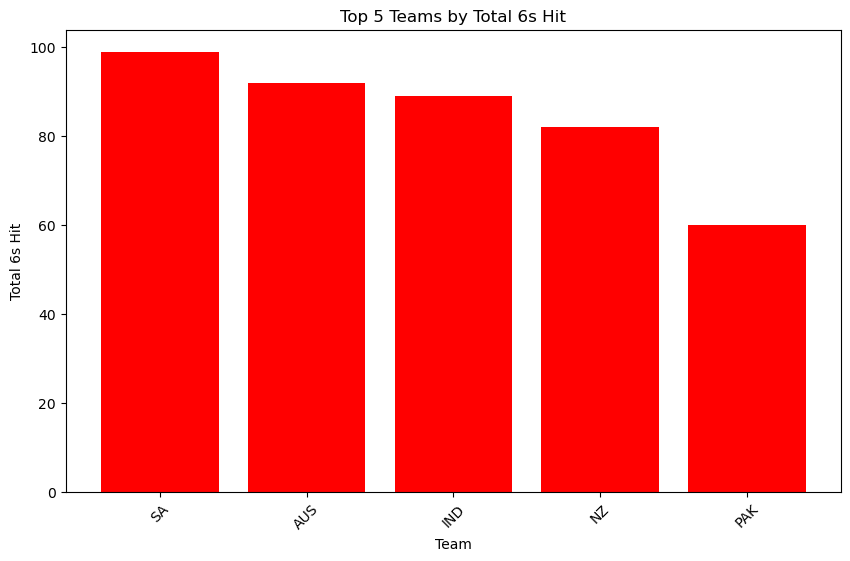

In [18]:
# Plotting top-performing teams based on boundaries hit (6s)
plt.figure(figsize=(10, 6))
plt.bar(top_teams_6s['team'], top_teams_6s['6s'], color='red')
plt.xlabel('Team')
plt.ylabel('Total 6s Hit')
plt.title('Top 5 Teams by Total 6s Hit')
plt.xticks(rotation=45)
plt.show()


The top 5 performing teams by boundaries hit (6s) are South Africa (SA), Australia (AUS), India (IND), New Zealand (NZ), and Pakistan (PAK). These teams showcase strong batting power with substantial numbers of sixes hit, indicating their ability to score heavily and dominate opposition bowling attacks.








# 2.Player Performance Analysis

In [19]:
# Batting Analysis
# Grouping by player and summing up batting statistics
batting_stats = data[data['bat_or_bowl'] == 'bat'].groupby('player').sum()

# Sorting players based on runs scored
leading_run_scorers = batting_stats.sort_values(by='runs', ascending=False).head(10)
print("\nLeading Run Scorers:")
print(leading_run_scorers[['runs', '4s', '6s', 'mins']])


Leading Run Scorers:
                        runs    4s    6s    mins
player                                          
V Kohli (IND)            711  64.0   9.0  1097.0
Q de Kock (SA)           594  57.0  21.0   799.0
R Ravindra (NZ)          578  55.0  17.0   872.0
DJ Mitchell (NZ)         552  48.0  22.0   724.0
RG Sharma (IND)          550  62.0  28.0   617.0
DA Warner (AUS)          528  49.0  24.0   758.0
SS Iyer (IND)            526  36.0  24.0   648.0
HE van der Dussen (SA)   448  39.0   8.0   794.0
MR Marsh (AUS)           426  42.0  20.0   528.0
AK Markram (SA)          406  44.0   9.0   510.0


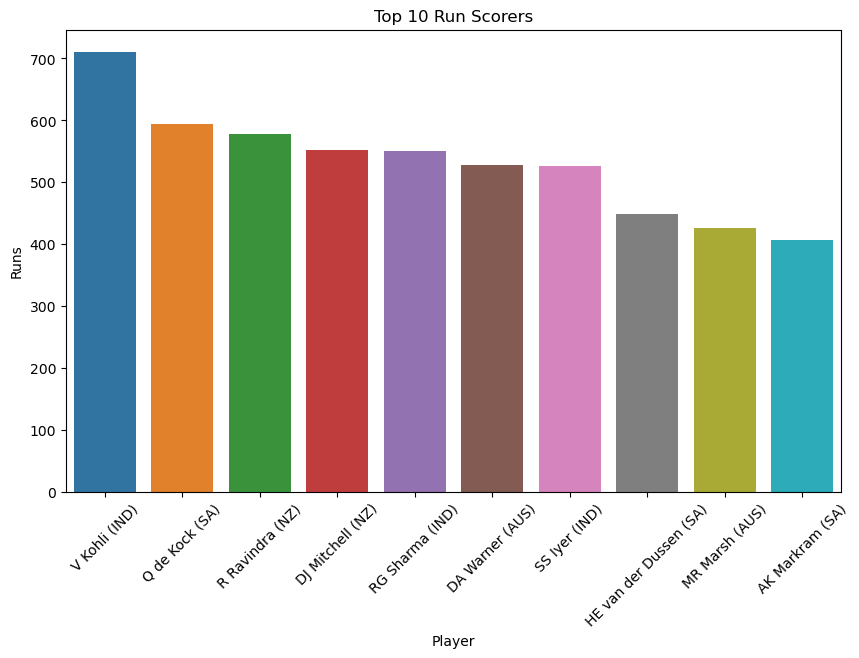

In [20]:
# Batting visualization - Top 10 run scorers
plt.figure(figsize=(10, 6))
sns.barplot(x=leading_run_scorers.index, y=leading_run_scorers['runs'])
plt.title('Top 10 Run Scorers')
plt.xlabel('Player')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.show()



- Virat Kohli (IND) emerges as the top run scorer with 711 runs, showcasing his consistency and ability to anchor the innings.
- Quinton de Kock (SA) follows closely with 594 runs, displaying his aggressive batting style with a high number of boundaries.
- Ravindra (NZ) and Mitchell (NZ) both from New Zealand have contributed significantly to their team's batting with 578 and 552 runs respectively, indicating their crucial roles in the batting lineup.
- Rohit Sharma (IND) and David Warner (AUS) have also showcased their prowess with 550 and 528 runs respectively, demonstrating their ability to score consistently.
- These leading run scorers have played pivotal roles in their respective teams' performances, contributing significantly to their success in the matches.

In [21]:
# Bowling Analysis
# Grouping by player and summing up bowling statistics
bowling_stats = data[data['bat_or_bowl'] == 'bowl'].groupby('player').sum()

# Sorting players based on wickets taken
leading_wicket_takers = bowling_stats.sort_values(by='wkts', ascending=False).head(10)

print("\nLeading Wicket Takers:")
print(leading_wicket_takers[['wkts', 'econ', 'overs']])



Leading Wicket Takers:
                           wkts   econ  overs
player                                       
Mohammed Shami (IND)       23.0  29.26   41.5
A Zampa (AUS)              22.0  53.80   86.0
D Madushanka (SL)          21.0  61.08   77.8
G Coetzee (SA)             20.0  51.54   63.3
JJ Bumrah (IND)            18.0  37.85   82.5
Shaheen Shah Afridi (PAK)  18.0  53.06   81.0
M Jansen (SA)              17.0  58.58   68.6
MJ Santner (NZ)            16.0  49.58   92.4
Haris Rauf (PAK)           16.0  60.92   79.0
RA Jadeja (IND)            16.0  43.69   82.9


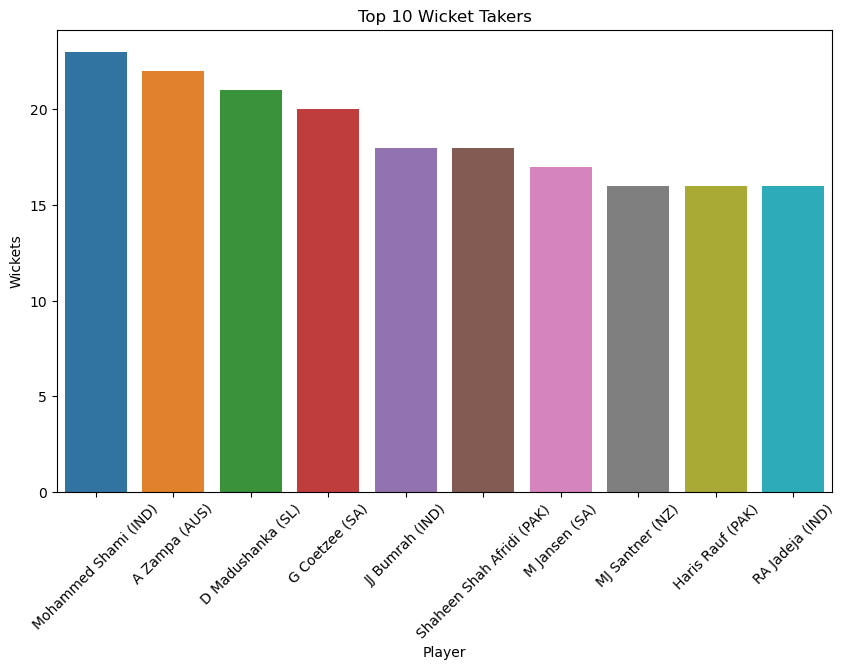

In [22]:
# Bowling visualization - Top 10 wicket takers
plt.figure(figsize=(10, 6))
sns.barplot(x=leading_wicket_takers.index, y=leading_wicket_takers['wkts'])
plt.title('Top 10 Wicket Takers')
plt.xlabel('Player')
plt.ylabel('Wickets')
plt.xticks(rotation=45)
plt.show()



- Mohammed Shami (IND) emerges as the top wicket-taker with 23 wickets, showcasing his ability to consistently take wickets and control the game.
- Adam Zampa (AUS) follows closely with 22 wickets, indicating his effectiveness in breaking partnerships and providing crucial breakthroughs.
- Dushmantha Madushanka (SL) has also been impressive with 21 wickets, despite playing for a team with relatively lower overall performance.
- These leading wicket-takers have played crucial roles in their teams' bowling attacks, contributing significantly to their success in restricting opposition teams and taking wickets at crucial junctures of the game.

In [23]:
# Assessing impact on team's performance

# Grouping by team and summing up runs and wickets
team_performance = data.groupby('team').sum()

# Adding a column for run rate
team_performance['run_rate'] = team_performance['runs'] / team_performance['overs']

# Adding a column for wicket rate
team_performance['wicket_rate'] = team_performance['wkts'] / team_performance['overs']

print("\nTeam Performance:")
print(team_performance[['runs', 'wkts', 'run_rate', 'wicket_rate']])



Team Performance:
      runs  wkts   run_rate  wicket_rate
team                                    
AFG   4134  53.0  10.358306     0.132799
AUS   5234  77.0  11.675217     0.171760
BAN   4358  51.0  10.977330     0.128463
ENG   4396  65.0  11.309493     0.167224
IND   4783  94.0  11.514203     0.226288
NED   4268  63.0  10.254685     0.151370
NZ    5376  71.0  11.967943     0.158059
PAK   4786  65.0  11.599612     0.157538
SA    5097  88.0  12.007067     0.207303
SL    4366  50.0  11.627164     0.133156


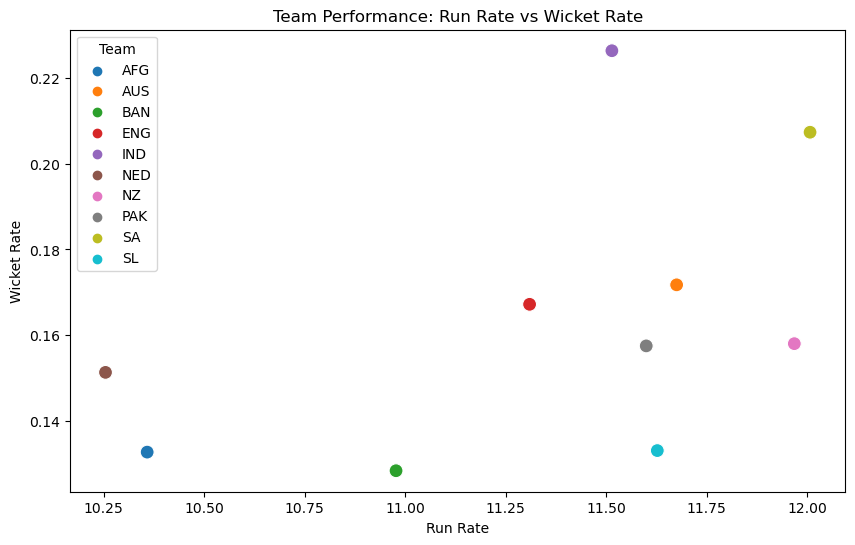

In [24]:
# Team performance visualization - Run Rate vs Wicket Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='run_rate', y='wicket_rate', data=team_performance, hue=team_performance.index, s=100)
plt.title('Team Performance: Run Rate vs Wicket Rate')
plt.xlabel('Run Rate')
plt.ylabel('Wicket Rate')
plt.legend(title='Team')
plt.show()

- New Zealand (NZ) and Australia (AUS) showcase strong overall performance, excelling in both batting and bowling metrics.
- India (IND) demonstrates a balanced performance, particularly excelling in taking wickets, which contributes significantly to their success.
- Sri Lanka (SL) appears to struggle in both batting and bowling departments, indicating areas for improvement to enhance overall team performance.
- South Africa (SA) exhibits a strong run rate but also needs to focus on improving their wicket-taking ability to enhance their performance further.






# 3. Opposition and Ground Analysis:

In [25]:
#Opposition Analysis
team_performance_opposition = data.groupby(['team', 'opposition']).agg({'runs': 'mean', 'wkts': 'mean'})
print("Team Performance Against Different Oppositions:")
print(team_performance_opposition)

Team Performance Against Different Oppositions:
                          runs      wkts
team opposition                         
AFG  v Australia     43.307692  1.000000
     v Bangladesh    18.937500  0.500000
     v England       28.235294  1.666667
     v India         32.812500  0.333333
     v Netherlands   31.454545  1.000000
...                        ...       ...
SL   v India         23.000000  1.000000
     v Netherlands   38.076923  1.500000
     v New Zealand   21.187500  0.800000
     v Pakistan      39.705882  0.571429
     v South Africa  43.117647  0.833333

[91 rows x 2 columns]


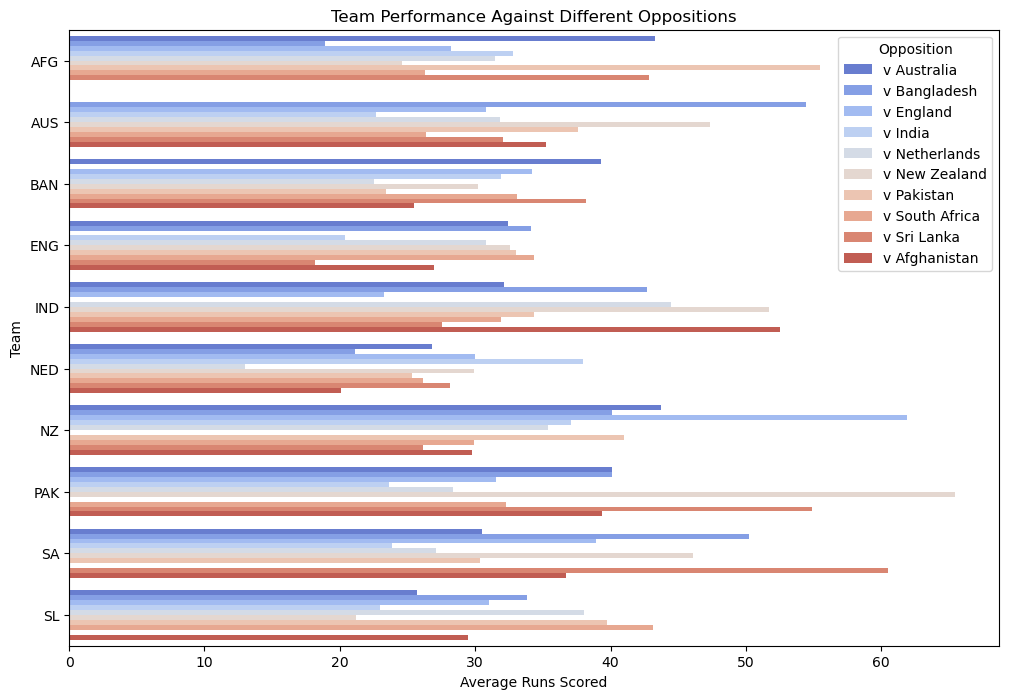

In [26]:
# Visualization - Team Performance Against Different Oppositions
plt.figure(figsize=(12, 8))
sns.barplot(x='runs', y=team_performance_opposition.index.get_level_values('team'), hue=team_performance_opposition.index.get_level_values('opposition'), data=team_performance_opposition.reset_index(), palette='coolwarm')
plt.title('Team Performance Against Different Oppositions')
plt.xlabel('Average Runs Scored')
plt.ylabel('Team')
plt.legend(title='Opposition')
plt.show()

- This graph shows information about how teams played various matches with their opponents and how their performance went with ravals.
- Although some teams scored very good runs and some teams scored low runs in their matches.

In [27]:
# Ground Analysis
team_performance_ground = data.groupby(['team', 'ground']).agg({'runs': 'mean', 'wkts': 'mean'})
print("\nTeam Performance on Different Grounds:")
print(team_performance_ground)


Team Performance on Different Grounds:
                      runs      wkts
team ground                         
AFG  Ahmedabad   26.277778  0.714286
     Chennai     36.037037  1.083333
     Delhi       30.454545  1.000000
     Dharamsala  18.937500  0.500000
     Lucknow     31.454545  1.000000
...                    ...       ...
SL   Delhi       38.606061  1.000000
     Hyderabad   39.705882  0.571429
     Lucknow     31.241379  1.083333
     Pune        29.437500  0.500000
     Wankhede    23.000000  1.000000

[72 rows x 2 columns]


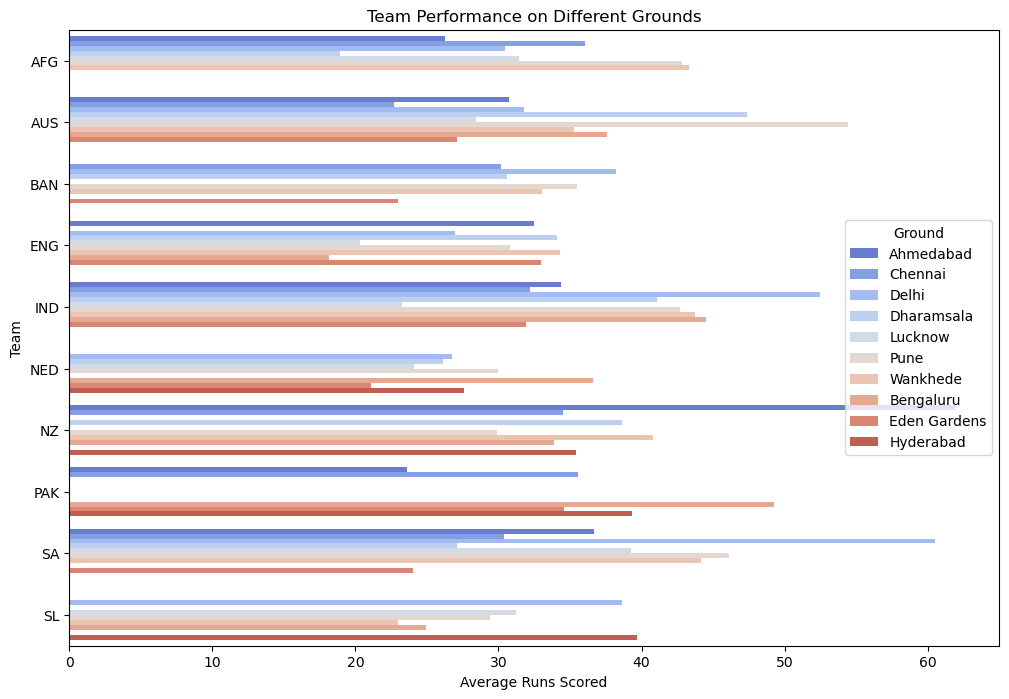

In [28]:
# Visualization - Team Performance on Different Grounds
plt.figure(figsize=(12, 8))
sns.barplot(x='runs', y=team_performance_ground.index.get_level_values('team'), hue=team_performance_ground.index.get_level_values('ground'), data=team_performance_ground.reset_index(), palette='coolwarm')
plt.title('Team Performance on Different Grounds')
plt.xlabel('Average Runs Scored')
plt.ylabel('Team')
plt.legend(title='Ground')
plt.show()



Graph is very likely to showes bond between teams and cricket grounds.Some teams were able to hit big scores and achieve targets on the other hand some teams scored very unsatisfactory runs.


In [29]:
# Team-wise Performance Analysis
team_performance = data.groupby(['team', 'opposition', 'ground']).agg({'runs': 'mean', 'wkts': 'mean'})


# Identify Teams Excelling in Certain Conditions
top_teams_by_runs = team_performance.groupby(['team', 'opposition']).mean().reset_index().sort_values(by='runs', ascending=False)
top_teams_by_wkts = team_performance.groupby(['team', 'opposition']).mean().reset_index().sort_values(by='wkts', ascending=False)


print("Teams Excelling in Certain Conditions (By Average Runs):")
print(top_teams_by_runs.head())
print("\nTeams Excelling in Certain Conditions (By Average Wickets):")
print(top_teams_by_wkts.head())



Teams Excelling in Certain Conditions (By Average Runs):
   team     opposition       runs      wkts
70  PAK  v New Zealand  65.444444  1.000000
58   NZ      v England  61.888889  1.500000
81   SA    v Sri Lanka  60.500000  2.000000
6   AFG     v Pakistan  55.500000  1.166667
72  PAK    v Sri Lanka  54.916667  1.500000

Teams Excelling in Certain Conditions (By Average Wickets):
   team      opposition       runs  wkts
75   SA    v Bangladesh  50.250000   2.0
81   SA     v Sri Lanka  60.500000   2.0
44  IND     v Sri Lanka  27.571429   2.0
43  IND  v South Africa  31.916667   2.0
39  IND       v England  23.266667   2.0



- Pakistan (PAK) demonstrates excellence against New Zealand in terms of average runs scored, showcasing their batting proficiency in matches against this opponent.
- South Africa (SA) stands out in matches against Sri Lanka with both average runs scored and average wickets taken, highlighting their overall strong performance against this opposition.
- India (IND) showcases exceptional bowling prowess against Sri Lanka, South Africa, and England, consistently taking an average of 2 wickets per match in these matchups, indicating their bowling dominance in varied conditions.

These insights underscore the importance of understanding team strengths and weaknesses against specific opponents and conditions, enabling teams to strategize effectively and optimize their performance in international cricket tournaments.







In [30]:
# Player-wise Performance Analysis
player_performance = data.groupby(['player', 'opposition', 'ground']).agg({'runs': 'mean', 'wkts': 'mean'})

# Identify Players Excelling in Certain Conditions
top_players_by_runs = player_performance.groupby(['player', 'opposition']).mean().reset_index().sort_values(by='runs', ascending=False)
top_players_by_wkts = player_performance.groupby(['player', 'opposition']).mean().reset_index().sort_values(by='wkts', ascending=False)

print("\nPlayers Excelling in Certain Conditions (By Average Runs):")
print(top_players_by_runs.head())
print("\nPlayers Excelling in Certain Conditions (By Average Wickets):")
print(top_players_by_wkts.head())



Players Excelling in Certain Conditions (By Average Runs):
                     player     opposition   runs  wkts
712          Q de Kock (SA)   v Bangladesh  174.0   NaN
160         DA Warner (AUS)     v Pakistan  163.0   NaN
200          DP Conway (NZ)      v England  152.0   NaN
165          DJ Malan (ENG)   v Bangladesh  140.0   NaN
263  HE van der Dussen (SA)  v New Zealand  133.0   NaN

Players Excelling in Certain Conditions (By Average Wickets):
                        player     opposition   runs  wkts
615       Mohammed Shami (IND)  v New Zealand  42.25   6.0
529            MJ Santner (NZ)  v Netherlands  47.50   5.0
860  Shaheen Shah Afridi (PAK)    v Australia  32.00   5.0
617       Mohammed Shami (IND)    v Sri Lanka  10.00   5.0
140          D Madushanka (SL)        v India  42.50   5.0



- Q de Kock (SA), DA Warner (AUS), DP Conway (NZ), DJ Malan (ENG), and HE van der Dussen (SA) have demonstrated exceptional batting performances against specific opponents.
- Mohammed Shami (IND), MJ Santner (NZ), Shaheen Shah Afridi (PAK), and D Madushanka (SL) have showcased remarkable bowling performances against specific opponents.

This indicates the importance of players adapting to different match conditions and opponents, contributing significantly to their team's success in cricket matches.

# 4. Temporal Analysis:

In [31]:
#Convert 'start_date' column to datetime format
data['start_date'] = pd.to_datetime(data['start_date'])

#Study performance trends over time
# Grouping data by start date and calculating average runs and wickets
performance_over_time = data.groupby('start_date').agg({'runs': 'mean', 'wkts': 'mean'})


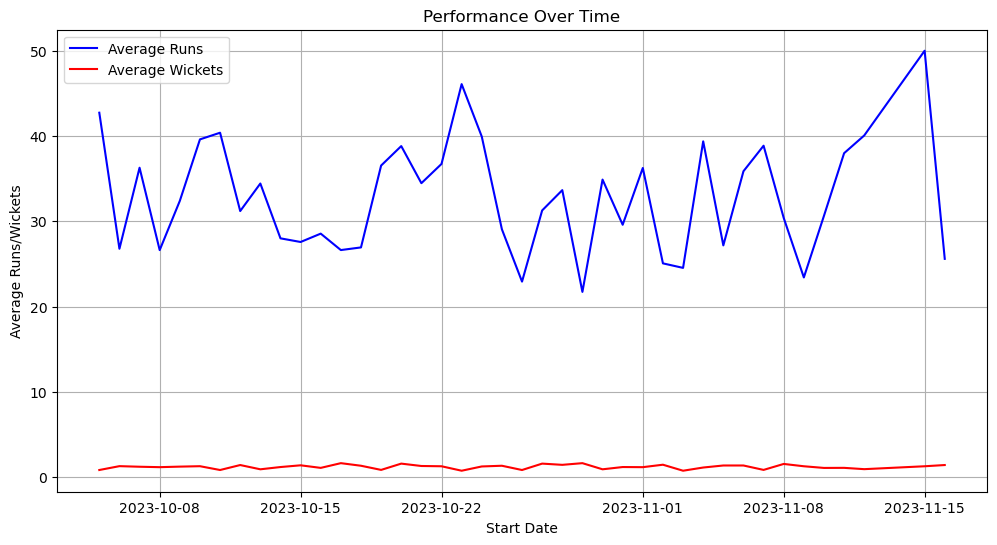

In [32]:
# Plotting performance over time
plt.figure(figsize=(12, 6))
plt.plot(performance_over_time.index, performance_over_time['runs'], label='Average Runs', color='blue')
plt.plot(performance_over_time.index, performance_over_time['wkts'], label='Average Wickets', color='red')
plt.title('Performance Over Time')
plt.xlabel('Start Date')
plt.ylabel('Average Runs/Wickets')
plt.legend()
plt.grid(True)
plt.show()


we observe that the average runs and wickets fluctuate over the timeline represented by the 'start_date' column. The plot illustrates the variations in batting and bowling performance over time, allowing us to identify trends and potentially correlate them with external factors such as changes in team composition, venue conditions, or tournament stages. Analyzing these trends can provide insights into the evolving dynamics of team performance throughout the specified period, aiding in strategic decision-making and performance assessment.

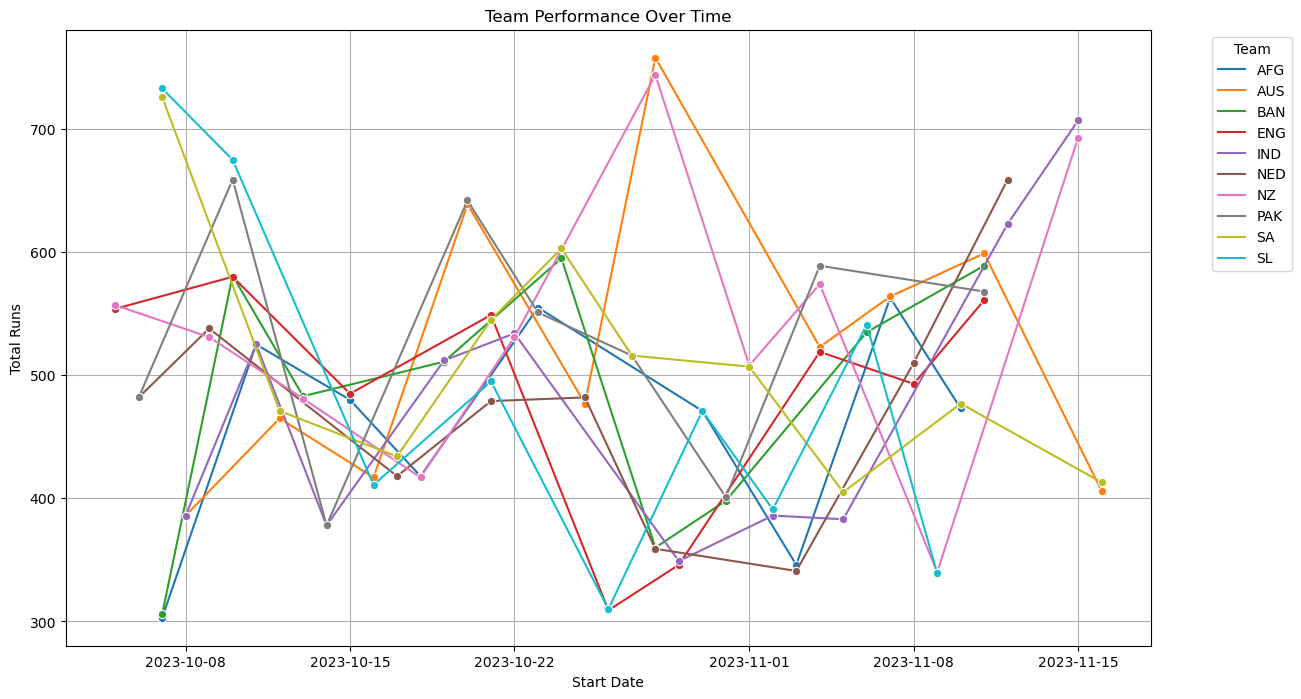

In [33]:
#Identify temporal patterns or changes in team and player performance
# Grouping data by team and start date, calculating total runs and wickets
team_performance = data.groupby(['team', 'start_date']).agg({'runs': 'sum', 'wkts': 'sum'}).reset_index()

# Plotting team performance over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=team_performance, x='start_date', y='runs', hue='team', marker='o', palette='tab10')
plt.title('Team Performance Over Time')
plt.xlabel('Start Date')
plt.ylabel('Total Runs')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



From the plotted team performance over time, we observe temporal patterns in the runs scored by different teams. Some teams show consistent or increasing trends in total runs over time, indicating their sustained performance or potential improvement. Conversely, fluctuations or decreasing trends may suggest periods of inconsistency or challenges faced by certain teams. Further analysis could identify factors influencing these trends, such as changes in team composition, match schedules, or external conditions affecting performance.

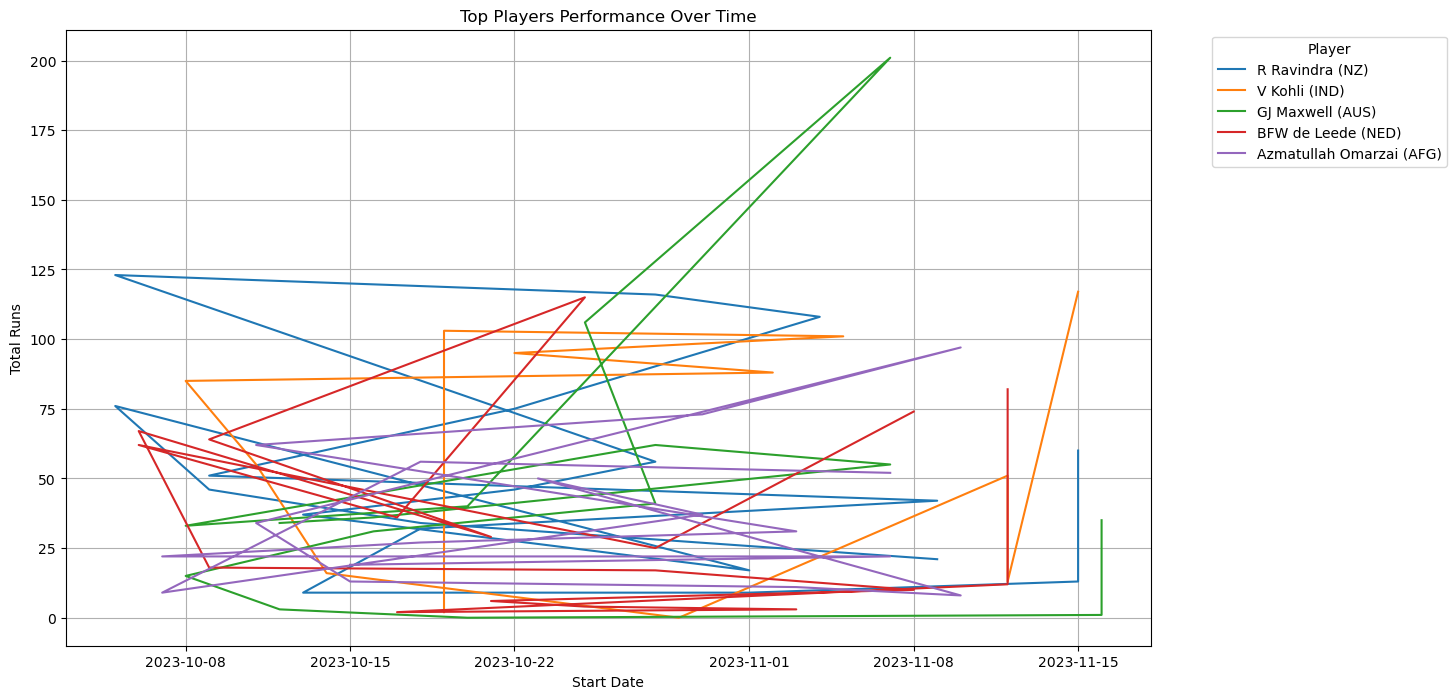

In [34]:
# Plotting player performance over time (top 5 players)
top_players =data.groupby('player').agg({'runs': 'sum', 'wkts': 'sum'}).nlargest(5, columns='runs')

plt.figure(figsize=(14, 8))
for player in top_players.index:
    player_data = data[data['player'] == player]
    plt.plot(player_data['start_date'], player_data['runs'], label=player)

plt.title('Top Players Performance Over Time')
plt.xlabel('Start Date')
plt.ylabel('Total Runs')
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

From the plotted data showcasing the performance of the top 5 players over time, it's evident that each player's runs fluctuate across different matches. While some players display consistent performance trends, others exhibit variations in their scoring patterns. This visualization highlights the dynamic nature of cricket and the individual player's contributions to their team's success over time.